# Improve CampusX

## Instructions

1. You have to submit your solutions before **6:00pm tomorrow**
2. The problems that I have given(**except the 1st one**) are problems with which we are also dealing with. So, in a way we are asking for your help through this hackathon.
3. To be honest solving even a single question is a big deal in the given time duration. So, please don't get **frustrated** if you are not able to solve even one problem. 
4. A request - **don't quit**. Infact **never quit**.
5. Marking Scheme for this hackathon is as follows
**Total Marks=200**
but, while adding this to your dashboard, your total marks will be divided by a **factor of 10**.
So, let's say you scored 90 in the hackathon, you dashboard score would be 9
6. Top 3 performers will get a **prize**, when we will meet next.Promise:)


**Problem 1** : Write a python function which will receive 3 input i.e. batch name, start date and end date and returns the leaderboard(in that date window) of that particular batch with the following pieces of info - Name, Marks(till now)

Note: If no date range is provided, show the leaderboard for the entire duration of the course

**Marks -10**

In [0]:
# Write your code here
def leaderboard(bat_name,date1,date2):
    import pandas as pd
    import numpy as np
    import datetime
    from collections import defaultdict
    users=pd.read_csv("/content/users.csv")
    myday=pd.read_csv("/content/myday.csv")
    gyan=pd.read_csv("/content/gyan.csv")
    evaluation=pd.read_csv("/content/evaluation.csv")
    batch=pd.read_csv("/content/batch.csv")
    date1=datetime.datetime.strptime(date1, "%Y-%m-%d").date()
    date2=datetime.datetime.strptime(date2, "%Y-%m-%d").date()
    if date2<date1:
        return print("'To' date cannot be more than 'From' date")
    batch_no=int(batch[batch["batch_name"]==bat_name]["batch_id"])
    current=users[users["batch_id"]==batch_no][["user_id","batch_id","fname","lname"]]#users of given batch
    #only students of given batch would be present
    current_eval=evaluation[evaluation["user_id"].isin(current["user_id"])]#evaluations of given batch
    current_gyan=gyan[gyan["user_id"].isin(current["user_id"])]
    myday=myday.dropna()
    current_myday=myday[myday["user_id"].isin(current["user_id"])]
    #Score evaluation
    date_eval=[]
    for i in current_eval["evaluation_date"]:
        date_eval.append(datetime.datetime.strptime(i, "%Y-%m-%d").date())
    current_eval["date"]=date_eval
    current_eval=current_eval[(current_eval["date"]>=date1)&(current_eval["date"]<=date2)]
    scores=defaultdict(int)#user id:scores
    groups=current_eval.groupby("user_id")["score"].sum()
    for i in groups.index:
        scores[i]=groups[i]
    #Gyan Evaluation
    date_gyan=[]
    for i in current_gyan["submission_date"]:
        date_gyan.append(datetime.datetime.strptime(i, "%Y-%m-%d").date())
    current_gyan["date"]=date_gyan
    current_gyan=current_gyan[(current_gyan["date"]>=date1)&(current_gyan["date"]<=date2)]
    gyans=defaultdict(int)#user id:scores
    groups=current_gyan.groupby("user_id")["submission_date"].count()
    groups
    for i in groups.index:
        scores[i]+=groups[i]
    #Myday evaluation
    date_myday=[]
    for i in current_myday["entry_date"]:
        date_myday.append(datetime.datetime.strptime(i, "%Y-%m-%d").date())
    current_myday["date"]=date_myday
    current_myday=current_myday[(current_myday["date"]>=date1)&(current_myday["date"]<=date2)]
    groups=defaultdict(int)#user id:scores
    groups=current_myday.groupby("user_id")["entry_date"].count()
    for i in groups.index:
        scores[i]+=groups[i]
        
    key=sorted(scores, key=scores.get, reverse=True)[0:15]
    leaderboard=current[current["user_id"].isin(key)]
    points=[]
    for i in leaderboard["user_id"]:
        points.append(scores[i])
    leaderboard["name"]=leaderboard["fname"].fillna("")+" "+leaderboard["lname"].fillna("")
    leaderboard=leaderboard.drop(["batch_id","fname","lname","user_id"],axis=1)
    leaderboard["marks"]=points
    return leaderboard.sort_values("marks",ascending=False)

In [0]:
def full_leaderboard(bat_name):
    import pandas as pd
    import numpy as np
    import datetime
    from collections import defaultdict
    users=pd.read_csv("/content/users.csv")
    myday=pd.read_csv("/content/myday.csv")
    gyan=pd.read_csv("/content/gyan.csv")
    evaluation=pd.read_csv("/content/evaluation.csv")
    batch=pd.read_csv("/content/batch.csv")
    date1=datetime.datetime.strptime("1900-01-01", "%Y-%m-%d").date()
    date2=datetime.datetime.strptime("3000-01-01", "%Y-%m-%d").date()
    batch_no=int(batch[batch["batch_name"]==bat_name]["batch_id"])
    current=users[users["batch_id"]==batch_no][["user_id","batch_id","fname","lname"]]#users of given batch
    #only students of given batch would be present
    current_eval=evaluation[evaluation["user_id"].isin(current["user_id"])]#evaluations of given batch
    current_gyan=gyan[gyan["user_id"].isin(current["user_id"])]
    myday=myday.dropna()
    current_myday=myday[myday["user_id"].isin(current["user_id"])]
    #Score evaluation
    date_eval=[]
    for i in current_eval["evaluation_date"]:
        date_eval.append(datetime.datetime.strptime(i, "%Y-%m-%d").date())
    current_eval["date"]=date_eval
    current_eval=current_eval[(current_eval["date"]>=date1)&(current_eval["date"]<=date2)]
    scores=defaultdict(int)#user id:scores
    groups=current_eval.groupby("user_id")["score"].sum()
    for i in groups.index:
        scores[i]=groups[i]
    #Gyan Evaluation
    date_gyan=[]
    for i in current_gyan["submission_date"]:
        date_gyan.append(datetime.datetime.strptime(i, "%Y-%m-%d").date())
    current_gyan["date"]=date_gyan
    current_gyan=current_gyan[(current_gyan["date"]>=date1)&(current_gyan["date"]<=date2)]
    gyans=defaultdict(int)#user id:scores
    groups=current_gyan.groupby("user_id")["submission_date"].count()
    groups
    for i in groups.index:
        scores[i]+=groups[i]
    #Myday evaluation
    date_myday=[]
    for i in current_myday["entry_date"]:
        date_myday.append(datetime.datetime.strptime(i, "%Y-%m-%d").date())
    current_myday["date"]=date_myday
    current_myday=current_myday[(current_myday["date"]>=date1)&(current_myday["date"]<=date2)]
    groups=defaultdict(int)#user id:scores
    groups=current_myday.groupby("user_id")["entry_date"].count()
    for i in groups.index:
        scores[i]+=groups[i]
        
    key=sorted(scores, key=scores.get, reverse=True)[0:15]
    leaderboard=current[current["user_id"].isin(key)]
    points=[]
    for i in leaderboard["user_id"]:
        points.append(scores[i])
    leaderboard["name"]=leaderboard["fname"].fillna("")+" "+leaderboard["lname"].fillna("")
    leaderboard=leaderboard.drop(["batch_id","fname","lname","user_id"],axis=1)
    leaderboard["marks"]=points
    return leaderboard.sort_values("marks",ascending=False)

In [0]:
def from_leaderboard(bat_name,date1):
    import pandas as pd
    import numpy as np
    import datetime
    from collections import defaultdict
    users=pd.read_csv("/content/users.csv")
    myday=pd.read_csv("/content/myday.csv")
    gyan=pd.read_csv("/content/gyan.csv")
    evaluation=pd.read_csv("/content/evaluation.csv")
    batch=pd.read_csv("/content/batch.csv")
    date1=datetime.datetime.strptime(date1, "%Y-%m-%d").date()
    date2=datetime.datetime.strptime("3000-01-01", "%Y-%m-%d").date()
    batch_no=int(batch[batch["batch_name"]==bat_name]["batch_id"])
    current=users[users["batch_id"]==batch_no][["user_id","batch_id","fname","lname"]]#users of given batch
    #only students of given batch would be present
    current_eval=evaluation[evaluation["user_id"].isin(current["user_id"])]#evaluations of given batch
    current_gyan=gyan[gyan["user_id"].isin(current["user_id"])]
    myday=myday.dropna()
    current_myday=myday[myday["user_id"].isin(current["user_id"])]
    #Score evaluation
    date_eval=[]
    for i in current_eval["evaluation_date"]:
        date_eval.append(datetime.datetime.strptime(i, "%Y-%m-%d").date())
    current_eval["date"]=date_eval
    current_eval=current_eval[(current_eval["date"]>=date1)&(current_eval["date"]<=date2)]
    scores=defaultdict(int)#user id:scores
    groups=current_eval.groupby("user_id")["score"].sum()
    for i in groups.index:
        scores[i]=groups[i]
    #Gyan Evaluation
    date_gyan=[]
    for i in current_gyan["submission_date"]:
        date_gyan.append(datetime.datetime.strptime(i, "%Y-%m-%d").date())
    current_gyan["date"]=date_gyan
    current_gyan=current_gyan[(current_gyan["date"]>=date1)&(current_gyan["date"]<=date2)]
    gyans=defaultdict(int)#user id:scores
    groups=current_gyan.groupby("user_id")["submission_date"].count()
    groups
    for i in groups.index:
        scores[i]+=groups[i]
    #Myday evaluation
    date_myday=[]
    for i in current_myday["entry_date"]:
        date_myday.append(datetime.datetime.strptime(i, "%Y-%m-%d").date())
    current_myday["date"]=date_myday
    current_myday=current_myday[(current_myday["date"]>=date1)&(current_myday["date"]<=date2)]
    groups=defaultdict(int)#user id:scores
    groups=current_myday.groupby("user_id")["entry_date"].count()
    for i in groups.index:
        scores[i]+=groups[i]
        
    key=sorted(scores, key=scores.get, reverse=True)[0:15]
    leaderboard=current[current["user_id"].isin(key)]
    points=[]
    for i in leaderboard["user_id"]:
        points.append(scores[i])
    leaderboard["name"]=leaderboard["fname"].fillna("")+" "+leaderboard["lname"].fillna("")
    leaderboard=leaderboard.drop(["batch_id","fname","lname","user_id"],axis=1)
    leaderboard["marks"]=points
    return leaderboard.sort_values("marks",ascending=False)

In [0]:
leaderboard("Machine Learning Kolkata 1","2020-01-09","2020-02-05")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/

,name,marks
15,Shakib Mondal,132.0
14,Kunal N. Gohrani,128.5
5,Dipam Hazra,127.0
4,Purbita Sur,118.0
20,Ujjainee De,118.0
13,Surabhi Basak,117.0
16,Shantanu Shubham,117.0
17,Chandrima Sarkar,117.0
8,Bhavna Kumari,114.0
11,Vishal Malo,113.5


In [0]:
full_leaderboard("Machine Learning Kolkata 2")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/

,name,marks
64,Ritwik Ghosh,196.5
65,Ritik Verma,193.0
79,Ritayan Dhara,190.5
67,Balaka Biswas,189.0
76,Alekhyo Banerjee,188.5
93,Priscila Tamang Ghising,187.5
85,Srijani Chaudhury,184.0
82,Writuparna Banerjee,183.0
57,Tuhin Mukherjee,182.5
66,Rajtilak Pal,182.0


In [0]:
from_leaderboard("Machine Learning HIT 1","2020-01-09")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/

,name,marks
36,Sumanta Mandal,92.0
33,Kirty Sharma,89.5
41,Saurabh Kumar,86.5
38,Rahul Mondal,83.0
46,Shubham Jha,78.5
37,Rahul Kumar,76.0
51,Surjayan Dutta,74.0
42,Shiv Prakash,50.5
27,Aryan Kumar Singh,46.5
50,Suman Kumar Suman,45.0


**Problem 2**: Write a python function that receives 1 input, batch_name and returns the list of top 10 students who require maximum attention from the teacher.

**Note**: I know this is kind of abstract, but truly we are facing this problem. Try to come up with a solution/algorithm. 

**Tip** : Don't just think in terms of marks, also think about things like late submissions, number of submissions, myday etc

**Tricky scenario**: Aisa bhi ho sakta hai koi student bas shuru me acha perform nai kar raha tha, but ab kar raha hai. So consider dates also.

**Marks : 50**

In [0]:
# Write your code here
# Write your code here
def naughty_list(bat_name):
    
    """This function uses the concept of a PID controller, used in control systems to make corrections in a 
    closed-looped system. The problem here is of similar type, where a teacher needs to give more and more attention 
    to a student who is not doing so great. The essence of each of the factors considered while calculating 
    the list has been included in the code as comments

    I have also taken the liberty to not include myday and gyan as a factor for this
    """
    
    
    
    
    import pandas as pd
    import numpy as np
    from collections import defaultdict
    
    #CONSTANTS (please change as per your judgement):
    submission_constant=20 #weightage of lack of submissions (important factor)
    late_constant=4 #weightage of late submissions (not very important a factor)
    win_constant=0.5 #weightage of lack of winning submissions (hardly matters much as far as teacher's attention goes)
    
    #Proportional. This just says where the stands considering the current task. Gives insight about instantaneous attention required. (not very important because of slight allowance for inconsistancy)
    KP=30 #Proportioanlity constant.
    
    #Integral. Tells how much persistantly bad a student may be doing. Extremely important. But the constant value should be kept small since the value accumulates and may become very large and hence the absolute deciding factor
    KI=30 #Integral constant
    
    #Derivative. Tells if attention should be increased or decreased from how it was last time.
    KD=45 #Differential constant
    
    users=pd.read_csv("/content/users.csv")
    evaluation=pd.read_csv("/content/evaluation.csv")
    batch=pd.read_csv("/content/batch.csv")
    batch_no=int(batch[batch["batch_name"]==bat_name]["batch_id"])
    current=users[users["batch_id"]==batch_no][["user_id","batch_id","fname","lname"]]#users of given batch
    #only students of given batch would be present
    current_eval=evaluation[evaluation["user_id"].isin(current["user_id"])]#evaluations of given batch
    per_user=current_eval.groupby("user_id")

    #I could've used one loop for adding all the factors but i did them seperately for clarity. I can show if required.
    
    
    scores=defaultdict(int)#user id:score of attention
    #Considering overall performance throughout the term
    groups=per_user["score"].sum()
    maximum=groups.max()
    for i in groups.index:
        scores[i]=maximum-groups[i]

    #Considering number of sumbissions (very important)
    submissions=per_user["score"].count()
    submission_max=submissions.max()
    
    for i in submissions.index:
        scores[i]+=(submission_max-submissions[i])*submission_constant
    
    #Considering late submissions (not that important)
    lates=per_user["late"].sum()
    
    for i in lates.index:
        scores[i]+=lates[i]*late_constant

    #Considering the lack of winning assignents (least important but considered)
    wins=per_user["winner"].sum()
    win_max=wins.max()
    
    for i in wins.index:
        scores[i]+=(win_max-wins[i])*win_constant

    score_max=current_eval.groupby("task_id")["score"].max()
    score_error=[]
    #Dividing score error by maximum score because each task has different full marks
    score_error=(score_max[current_eval["task_id"]].values-current_eval["score"].values)/score_max[current_eval["task_id"]].values
    current_eval["score_error"]=score_error

    #Proportional. This just says where the stands considering the current task. Gives insight about instantaneous attention required. (not very important because of slight allowance for inconsistancy)
    
    lasts=per_user.tail(1)
    for i in groups.index:
        scores[i]+=(lasts.iloc[np.where(lasts["user_id"]==i)[0],7].values[0])*KP

    #Integral. Tells how much persistantly bad a student may be doing. Extremely important. But the constant value should be kept small since the value accumulates and may become very large and hence the absolute deciding factor
    
    #Only last 5 tasks have been considered to allow for old results to be ignored.
    for i in groups.index:
        scores[i]+=(per_user.tail(5).groupby("user_id")["score_error"].sum()*KI)[i]

    #Derivative. Tells if attention should be increased or decreased from how it was last time.
    
    current_eval
    #Last error - 2nd last error (gives delta for Derivative and says if the student has improved/degraded from last task)
    for i in groups.index:
        scores[i]+=((lasts.set_index("user_id")["score_error"]-per_user.tail(2).groupby("user_id").head(1)["score_error"].values)*KD)[i]

    #finding the naughtiest 10
    key=sorted(scores, key=scores.get, reverse=True)[0:10]
    naughty=current[current["user_id"].isin(key)]
    attention=[]
    for i in naughty["user_id"]:
        attention.append(scores[i])
    #basicaly scaling/mapping the data to give a relative outcome
    relativity=max(attention)
    attention=(attention/relativity)*100
    naughty["name"]=naughty["fname"].fillna("")+" "+naughty["lname"].fillna("")
    naughty=naughty.drop(["batch_id","fname","lname"],axis=1)
    naughty["attention_required"]=attention
    return naughty.sort_values("attention_required", ascending=False)

In [0]:
naughty_list("Machine Learning Kolkata 2")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,user_id,name,attention_required
87,98,Om Prakash Shaw,100.000000
88,99,Abhiraj Gope,99.035813
62,73,Dilshad Hussain,78.934756
60,71,Soumyajyoti Karmakar,76.290416
92,103,Rajrupa Mitra,66.271567
83,94,Rahul Shaw,63.272149
75,86,Banti Pandey,61.627652
68,79,Srinjoy Chowdhury,54.610109
84,95,RAHUL SINGH,54.523558
69,80,Rahul Ghosh,47.215811


**Problem 3**: Write a python function that will take batch name and a date range as input and outputs the most consistent student in that given daterange and batch

**Note**: Come up with your definition of consistency

**Marks - 20** 

In [0]:
# Write your code here
# Write your code here
def consistent(bat_name,date1,date2):
    """The following factors have been taken into account:
    1)Number of submissions
    2)Late submissions
    3)Submission of MyDay
    4)Submission of Gyan
    5)Correlation between task chronology and general improvement of rank in class, showing that consistent hard work is paying off
    """
    import pandas as pd
    import numpy as np
    import datetime
    from collections import defaultdict
    
    #CONSTANTS(please change as per your judgement)
    submission_constant=5
    late_constant=3
    gyan_constant=0.5
    myday_constant=0.5
    SD_constant=2 #SD here is actually correlation factor. bad variable name.
    
    date1=datetime.datetime.strptime(date1, "%Y-%m-%d").date()
    date2=datetime.datetime.strptime(date2, "%Y-%m-%d").date()
    if date2<date1:
        return print("'To' date cannot be more than 'From' date")
    users=pd.read_csv("/content/users.csv")
    myday=pd.read_csv("/content/myday.csv")
    gyan=pd.read_csv("/content/gyan.csv")
    evaluation=pd.read_csv("/content/evaluation.csv")
    batch=pd.read_csv("/content/batch.csv")
    batch_no=int(batch[batch["batch_name"]==bat_name]["batch_id"])
    current=users[users["batch_id"]==batch_no][["user_id","batch_id","fname","lname"]]#users of given batch
    current_eval=evaluation[evaluation["user_id"].isin(current["user_id"])]#evaluations of given batch
    current_gyan=gyan[gyan["user_id"].isin(current["user_id"])]
    myday=myday.dropna()
    current_myday=myday[myday["user_id"].isin(current["user_id"])]
    date_eval=[]
    date_gyan=[]
    date_myday=[]
    for i in current_eval["evaluation_date"]:
        date_eval.append(datetime.datetime.strptime(i, "%Y-%m-%d").date())
    for i in current_gyan["submission_date"]:
        date_gyan.append(datetime.datetime.strptime(i, "%Y-%m-%d").date())
    for i in current_myday["entry_date"]:
        date_myday.append(datetime.datetime.strptime(i, "%Y-%m-%d").date())
    current_eval["date"]=date_eval
    current_gyan["date"]=date_gyan
    current_myday["date"]=date_myday
    current_eval=current_eval[(current_eval["date"]>=date1)&(current_eval["date"]<=date2)]
    current_gyan=current_gyan[(current_gyan["date"]>=date1)&(current_gyan["date"]<=date2)]
    current_myday=current_myday[(current_myday["date"]>=date1)&(current_myday["date"]<=date2)]
    
    score_max=current_eval.groupby("task_id")["score"].max()
    score_error=[]
    #Dividing score error by maximum score because each task has different full marks
    score_error=(score_max[current_eval["task_id"]].values-current_eval["score"].values)/score_max[current_eval["task_id"]].values
    current_eval["score_error"]=score_error
    
    
    per_user=current_eval.groupby("user_id")
    scores=defaultdict(int)#user id:score of consistency
    SD=defaultdict(int)#user id:correlation coefficient
    submissions=per_user["score"].count()
    lates=per_user["late"].sum()
    for i in submissions.index:
        if np.isnan(per_user.get_group(i).corr().loc["e_id","score_error"]):
            SD[i]=0
        else:
            SD[i]=per_user.get_group(i).corr().loc["e_id","score_error"]
        scores[i]=submission_constant*submissions[i]-late_constant*lates[i]
    for i in current_gyan.groupby("user_id").size().index:
        scores[i]+=gyan_constant*current_gyan.groupby("user_id").size()[i]
    for i in current_myday.groupby("user_id").size().index:
        scores[i]+=myday_constant*current_myday.groupby("user_id").size()[i]
    for i in SD.keys():
        scores[i]+=SD_constant*SD[i]
    key=sorted(scores, key=scores.get, reverse=True)[0]
    loc=np.where(current["user_id"]==key)[0][0]
    name=current.iloc[loc,2]+" "+current.iloc[loc,3]
    print("The most consistent student is",name)

In [0]:
consistent("Machine Learning Kolkata 1","2020-01-01","2020-02-01")

The most consistent student is Dipam Hazra


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/

**Problem 4**: Find the best student across batches

**Marks - 20**

In [0]:
# Write your code here

#Consistency has not been considered seperately because best student is defined by high scores invariable of consistency
#Wins have not been considered as it is relative of the batch and not across all batches. So it will be unfair for a batch with better students.
#The result shall be INDEPENDENT of number of tasks given, marks of the tasks and commencement date of batch
def best():
    import pandas as pd
    import numpy as np
    import datetime
    from collections import defaultdict

    #CONSTANTS(please change as per judgment):
    evaluation_weight=10
    myday_weight=1
    gyan_weight=1
    late_weight=1

    users=pd.read_csv("/content/users.csv")
    myday=pd.read_csv("/content/myday.csv")
    gyan=pd.read_csv("/content/gyan.csv")
    evaluation=pd.read_csv("/content/evaluation.csv")
    batch=pd.read_csv("/content/batch.csv")
    myday=myday.dropna()
    #Considering marks of MyDay by dividing it with total posible marks that may be scored
    tot_myday=myday.merge(users[["user_id","batch_id"]],how="left",left_on="user_id",right_on="user_id")
    tot_myday
    date_myday=[]
    for i in tot_myday["entry_date"]:
        date_myday.append(datetime.datetime.strptime(i, "%Y-%m-%d").date())
    tot_myday["date"]=date_myday
    batch_date=[]
    #checking which date is earlier batch start date or day of commencement of myday, thus cleaning the data
    for i in batch["batch_start_date"]:
        if datetime.datetime.strptime(i, "%Y-%m-%d").date()<tot_myday.iloc[0,5]:
            batch_date.append(tot_myday.iloc[0,5])
        else:
            batch_date.append(datetime.datetime.strptime(i, "%Y-%m-%d").date())
    batch["date"]=batch_date
    days_passed=[]
    for i in range(0,len(tot_myday)):
        days_passed.append((tot_myday.iloc[i,5]-batch.iloc[np.where(batch["batch_id"]==tot_myday.iloc[i,4])[0][0],3]).days)
    tot_myday["days"]=days_passed
    tot_myday["days"]+=1#prevents division by 0 on first day of batch
    #taking only days where both myday had started and batch had commenced
    tot_myday=tot_myday[tot_myday["days"]>0]
    scores=defaultdict(int)#user id:score
    
    #number of myday submissions divided by total number possible multiplied by weight
    for i in tot_myday["user_id"]:
        scores[i]=(len(tot_myday.groupby("user_id").get_group(i))/tot_myday.groupby("batch_id").get_group(users.iloc[(np.where(users["user_id"]==i))[0][0],1])["days"].max())*myday_weight

    #Considering marks of Gyan by dividing it with total posible marks that may be scored
    tot_gyan=gyan.merge(users[["user_id","batch_id"]],how="left",left_on="user_id",right_on="user_id")
    date_gyan=[]
    for i in tot_gyan["submission_date"]:
        date_gyan.append(datetime.datetime.strptime(i, "%Y-%m-%d").date())
    tot_gyan["date"]=date_gyan
    batch_date=[]
    #checking which date is earlier batch start date or day of commencement of myday, thus cleaning the data
    for i in batch["batch_start_date"]:
        if datetime.datetime.strptime(i, "%Y-%m-%d").date()<tot_gyan.iloc[0,6]:
            batch_date.append(tot_gyan.iloc[0,6])
        else:
            batch_date.append(datetime.datetime.strptime(i, "%Y-%m-%d").date())
    batch["date"]=batch_date
    days_passed=[]
    for i in range(0,len(tot_gyan)):
        days_passed.append((tot_gyan.iloc[i,6]-batch.iloc[np.where(batch["batch_id"]==tot_gyan.iloc[i,5])[0][0],3]).days)
    tot_gyan["days"]=days_passed
    tot_gyan["days"]+=1#prevents division by 0 on first day of batch
    
    #taking only days where both gyan had started and batch had commenced
    tot_gyan=tot_gyan[tot_gyan["days"]>0]
    
    #number of myday submissions divided by total number possible multiplied by weight
    for i in tot_gyan["user_id"]:
        scores[i]+=(len(tot_gyan.groupby("user_id").get_group(i))/tot_gyan.groupby("batch_id").get_group(users.iloc[(np.where(users["user_id"]==i))[0][0],1])["days"].max())*gyan_weight

    #Considering task scores
    tot_eval=evaluation.merge(users[["user_id","batch_id"]],how="left",left_on="user_id",right_on="user_id")
    for i in tot_eval["user_id"]:
    
        #individual sum of scores have been divided by sum of maximum marks scored for each taks batch wise to provide relativity
        scores[i]+=(tot_eval.groupby("user_id").get_group(i)["score"].sum()/tot_eval.groupby("batch_id").get_group(tot_eval.iloc[i,7]).groupby("task_id")["score"].max().sum())*evaluation_weight
    
        #number of late submissions of each user divided by number of tasks given in that batch multiplied by the weight
        scores[i]-=((tot_eval.groupby("user_id").get_group(i))["late"].sum()/max(tot_eval.groupby("batch_id").get_group(tot_eval.iloc[np.where(tot_eval["user_id"]==i)[0][0],7]).groupby("user_id").size()))*late_weight

    key=sorted(scores, key=scores.get, reverse=True)[0]
    loc=np.where(users["user_id"]==key)[0][0]
    name=users.iloc[loc,2]+" "+users.iloc[loc,3]
    print("The best student across all batches is",name)

In [0]:
best()

The best student across all batches is Ritwik Ghosh


**Problem 5** : Write a function/piece of analysis that can compare the performance of 2 batches on the whole

**Note**: Again Abstract

**Note 2**: Will be judging you a lot on the basis of this.

**Note 3**: You can get an instant internship under us, if can apply the right thought process to this problem

**Marks - 50**

In [0]:
def reject_outliers(data, m = 4.3):
    import numpy as np
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else 0.
    return data[s<m]

In [0]:
# Write your code here
"""Here I have taken the sum of all scores including tasks, myday and gyan and removed the
outliers from both the batches. Then the average has been found out and number of tasks has
also been taken care of and made relative. Gyan and Myday was not used in the last minute as this
function looks solely towards the academic performance.
"""
def compare(bat1,bat2):

    import pandas as pd
    import numpy as np
    from collections import defaultdict
    from fractions import Fraction
    
    users=pd.read_csv("/content/users.csv")
    evaluation=pd.read_csv("/content/evaluation.csv")
    batch=pd.read_csv("/content/batch.csv")
    myday=pd.read_csv("/content/myday.csv")
    gyan=pd.read_csv("/content/gyan.csv")

    batch_no=int(batch[batch["batch_name"]==bat1]["batch_id"])
    current=users[users["batch_id"]==batch_no][["user_id"]]#users of given batch

    #only students of given batch would be present
    current_eval=evaluation[evaluation["user_id"].isin(current["user_id"])]#evaluations of given batch
    current_gyan=gyan[gyan["user_id"].isin(current["user_id"])]
    myday=myday.dropna()
    current_myday=myday[myday["user_id"].isin(current["user_id"])]
    tasks=len(current_eval["task_id"].unique())

    #Score evaluation
    scores=defaultdict(int)#user id:scores
    groups=current_eval.groupby("user_id")["score"].sum()
    for i in groups.index:
        scores[i]=groups[i]
    
    # #Gyan Evaluation
    # groups=current_gyan.groupby("user_id")["submission_date"].count()
    # for i in groups.index:
    #     scores[i]+=groups[i]
    
    # #myday evaluation
    # groups=current_myday.groupby("user_id")["entry_date"].count()
    # for i in groups.index:
    #     scores[i]+=groups[i]
    
    score1=reject_outliers(np.array(list(scores.values())))
    avg1=score1.mean()/tasks

    batch_no=int(batch[batch["batch_name"]==bat2]["batch_id"])
    current=users[users["batch_id"]==batch_no][["user_id"]]#users of given batch

    #only students of given batch would be present
    current_eval=evaluation[evaluation["user_id"].isin(current["user_id"])]#evaluations of given batch
    current_gyan=gyan[gyan["user_id"].isin(current["user_id"])]
    myday=myday.dropna()
    current_myday=myday[myday["user_id"].isin(current["user_id"])]
    tasks=len(current_eval["task_id"].unique())

    #Score evaluation
    scores=defaultdict(int)#user id:scores
    groups=current_eval.groupby("user_id")["score"].sum()
    for i in groups.index:
        scores[i]=groups[i]
    
    # #Gyan Evaluation
    # groups=current_gyan.groupby("user_id")["submission_date"].count()
    # for i in groups.index:
    #     scores[i]+=groups[i]
    
    # #myday evaluation
    # groups=current_myday.groupby("user_id")["entry_date"].count()
    # for i in groups.index:
    #     scores[i]+=groups[i]
    
    score2=reject_outliers(np.array(list(scores.values())))
    avg2=score2.mean()/tasks
    ratio=avg1/avg2
    print("Performance of",bat1,"vs performance of",bat2,"is in the ratio",Fraction(ratio).limit_denominator(1000))

In [0]:
compare("Machine Learning HIT 1","Machine Learning Kolkata 2")

Performance of Machine Learning HIT 1 vs performance of Machine Learning Kolkata 2 is in the ratio 217/286


**Problem 6** : Surprise us

**Description**: Find something(point/points of analysis) that might surprise us

**Marks - 50**

In [0]:
def reject_outliers(data, m = 4.3):
    import numpy as np
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else 0.
    return data[s<m]

In [0]:
def learning_curve(bat_name):
    
    """This function provides two insights: 1)overall academic imporvement which considers the academic imporvement
    of all students.
    2)Knowledge gain of the batch with tasks given, as the students are able to tackle the tasks better with each
    following task
    """
    import pandas as pd
    import numpy as np
    from collections import defaultdict
    import matplotlib.pyplot as plt
    
    users=pd.read_csv("/content/users.csv")
    evaluation=pd.read_csv("/content/evaluation.csv")
    batch=pd.read_csv("/content/batch.csv")
    batch_task=pd.read_csv("/content/batch_task.csv")

    print("Maximum value of the coefficients =+1 and minimum value of the coefficients=-1")
    print("Coefficient closer to +1 would indicate more imporvement with 1=linear imporvement for every task.")
    print("Similar with -1, only in a negative sense")
    #only evaluations of a particular batch considered
    batch_no=int(batch[batch["batch_name"]==bat_name]["batch_id"])
    tot_eval=evaluation.merge(users[["user_id","batch_id"]],how="left",left_on="user_id",right_on="user_id")
    tot_eval=tot_eval[tot_eval["batch_id"]==batch_no]
    
    #getting tasks assigned to a particular batch
    tasks=batch_task[batch_task["batch_id"]==batch_no]
    tot_eval=tot_eval.groupby("batch_id").get_group(batch_no)
    
    scores=defaultdict(int)#task_id: score
    
    #finding the correlation of task number and relative score for each task.
    #This aims to find out if the entire class (both active and passive students) in general is improving. This should
    #provide insight about the overall improvement of the class academically and tells if the classes have helped all students positively
    #as the class in general scores higher with every next task.
    
    #relative marks have been considered nullifying the effect of difference of marks between tasks
    
    for i in tasks["task_id"]:
        if i in list(tot_eval["task_id"]):
            scores[i]=tot_eval.groupby("task_id").get_group(i)["score"].sum()/tot_eval.groupby("task_id").get_group(i)["score"].max()
    y=reject_outliers(np.array(list(scores.values())))
    x=list(range(0,(len(y))))
    corr=pd.DataFrame(list(zip(x,y)),columns=["x","y"]).corr().loc["x","y"]
    print("Degree of overall academic imporvement of the batch with respect to task number=",corr)
    plt.plot(x,y)
    plt.xlabel("tasks")
    plt.ylabel("relative rank of tasks")
    plt.show()
    #finding the correlation of task number and relative score for each task.
    #This aims to find out if the knowledge level of the class is improving. Only students who submit have been considered.
    #This provides insight about the knowledge improvement of the class academically as the scores of more and more students are higher
    #with every next task, and handle the tasks better as a whole.
    
    #relative marks have been considered nullifying the effect of difference of marks between tasks
    
    for i in tasks["task_id"]:
        if i in list(tot_eval["task_id"]):
            scores[i]=(tot_eval.groupby("task_id").get_group(i)["score"].sum()/tot_eval.groupby("task_id").get_group(i)["score"].count())/tot_eval.groupby("task_id").get_group(i)["score"].max()
    y=reject_outliers(np.array(list(scores.values())))
    x=list(range(0,(len(y))))
    corr=pd.DataFrame(list(zip(x,y)),columns=["x","y"]).corr().loc["x","y"]
    print("Degree of knowledge gain of the batch with respect to task number=",corr)
    plt.plot(x,y)
    plt.xlabel("tasks")
    plt.ylabel("relative rank of tasks")
    plt.show()

Maximum value of the coefficients =+1 and minimum value of the coefficients=-1
Coefficient closer to +1 would indicate more imporvement with 1=linear imporvement for every task.
Similar with -1, only in a negative sense
Degree of overall academic imporvement of the batch with respect to task number= -0.6860507737412717


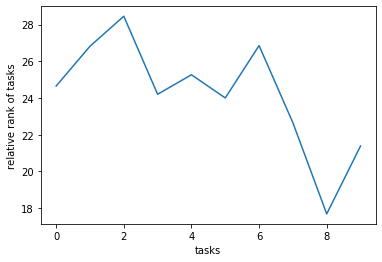

Degree of knowledge gain of the batch with respect to task number= 0.3748630781070693


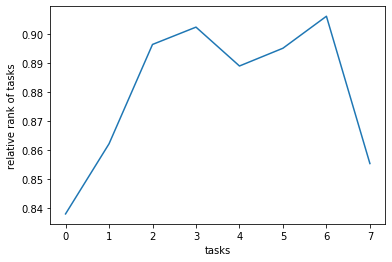

In [0]:
learning_curve("Machine Learning Kolkata 2")